In [1]:
import os

if os.path.exists('credential.json'):
    os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = os.path.join(os.getcwd(), 'credential.json')
    os.environ["GOOGLE_CLOUD_PROJECT"] = "trading-290017"
else:
    print('the credential.json file does not exist')

import importlib

In [2]:
import pandas as pd

In [13]:
df_news = pd.read_parquet('ambush.parquet')
df_news['symbol_swap'] = df_news['symbol'].astype(str) + '-USDT-SWAP'
df_news['timestamp'] = df_news.timestamp.dt.floor('1min')

In [14]:
df_news.head(50).tail(5)

,timestamp,symbol,title,price_at_new,symbol_swap
45,2024-04-17 22:45:00+00:00,APT,The first liquid NFT on Aptos is here,9.2860,APT-USDT-SWAP
46,2024-04-17 15:45:00+00:00,FET,DeltaV & AI Engine Upgrade lets you Chat to We...,1.9023,FET-USDT-SWAP
47,2024-04-17 15:02:00+00:00,SAND,BUILDERS BOOTCAMPS,0.4224,SAND-USDT-SWAP
48,2024-04-17 13:11:00+00:00,RON,BREAKING: RAGNAROK: MONSTER WORLD IS COMING TO...,3.0650,RON-USDT-SWAP
49,2024-04-17 13:08:00+00:00,ARB,Introducing Anomaly: AI-Powered Layer 3 for Ga...,1.1166,ARB-USDT-SWAP


In [15]:
len(df_news.symbol.unique())

295

In [16]:
df_news[df_news.symbol == 'USDT'].title.values

array(['We just deployed 1.5M $USDT on @ton_blockchain. It is not an investment, it is only about increasing circulation supply of native USDT on the chain.  Scaling it up asap. LFG!',
       'As predicted, #TetherTreasury minted 1B $USDT on #Ethereum 2 hours ago.',
       'Exciting update! #USDT on #Solana is now supported on @travalacom  ✈️\n🌎 Book your next adventure with faster, cheaper transactions. \nDive into over 3 million travel products worldwide with $USDT on $SOL! 🏖🏨\nStart planning your dream trip today! ',
       'We’ve made the last payment of 57,456 $USDT to @modusdapp, finalizing our investment in its groundbreaking Real World Asset project.\nBased in the United Kingdom, Modus gives access to fractionalized property development investment opportunities with tokenized #RWAs.\nOffering… ',
       'A smart whale spent 8.58M $USDT to buy 166 $WBTC at $51,797 today.\nThe whale bought 4,913 $ETH($13.7M) at an average price of $1,262 and 186 $WBTC($9.64M) at an average price 

In [17]:
df_news.groupby(['title', 'symbol']).count().sort_values('symbol').tail(10)

,,timestamp,price_at_new,symbol_swap
title,symbol,,,
Today's ZetaScan update lets users explore staking transactions on ZetaChain. More exciting optimizations for ZetaScan Explorer coming soon!,ZETA,1,1,1
Coinbase launches Learning Rewards and ZetaChain support on Coinbase Wallet to bring omnichain to…,ZETA,1,1,1
"Tutorial: Bridge assets, Swap and LP (v3) on Zetachain via Sushi",ZETA,1,1,1
ZetaChain Launches Alchemy Pay’s Ramp Solution on Its Website for $ZETA Access,ZETA,2,2,2
ZetaChain and Galxe announce BTC drop for next generation Bitcoin Smart Contracts,ZETA,1,1,1
ZetaHub introduces XP for dApps,ZETA,1,1,1
We're excited to bring omnichain interoperability to @coin98_wallet users! Access all of crypto from one chain.,ZETA,1,1,1
ZilBridge back online following extended downtime,ZIL,1,1,1
Alchemy Pay Partners with ZKFair to Launch Fiat On-Ramp for Direct $ZKF Purchase,ZKF,1,1,1


In [8]:
import market_data.ingest.bq.cache
importlib.reload(market_data.ingest.bq.cache)

<module 'market_data.ingest.bq.cache' from '/home/junlim/projects/telegram_message/market_data/ingest/bq/cache.py'>

In [27]:
df_price = market_data.ingest.bq.cache.fetch_and_cache(
    dataset_mode = market_data.ingest.bq.common.DATASET_MODE.OKX,
    export_mode = market_data.ingest.bq.common.EXPORT_MODE.BY_MINUTE,
    aggregation_mode = market_data.ingest.bq.common.AGGREGATION_MODE.TAKE_LASTEST,
    date_str_from='2024-02-15', 
    date_str_to='2024-04-12',
).reset_index()
df_close = df.pivot(index='timestamp', columns='symbol', values='close')
dfi = df.set_index(['timestamp', 'symbol'])

In [190]:
import data.okx.read
import importlib
importlib.reload(data.okx.read)

<module 'data.okx.read' from '/home/junlim/projects/telegram_message/data/okx/read.py'>

In [28]:
df_price

,index,symbol,timestamp,open,high,low,close,volume
0,0,1INCH-USD-SWAP,2024-02-15 00:00:00-05:00,0.4477,0.4477,0.4477,0.4477,0.0
1,1,1INCH-USD-SWAP,2024-02-15 00:01:00-05:00,0.4477,0.4477,0.4477,0.4477,0.0
2,2,1INCH-USD-SWAP,2024-02-15 00:02:00-05:00,0.4477,0.4477,0.4477,0.4477,0.0
3,3,1INCH-USD-SWAP,2024-02-15 00:03:00-05:00,0.4477,0.4477,0.4477,0.4477,0.0
4,4,1INCH-USD-SWAP,2024-02-15 00:04:00-05:00,0.4477,0.4477,0.4477,0.4477,0.0
...,...,...,...,...,...,...,...,...
17024346,17024346,ZRX-USDT-SWAP,2024-04-11 23:55:00-04:00,0.6419,0.6426,0.6419,0.6426,3910.0
17024347,17024347,ZRX-USDT-SWAP,2024-04-11 23:56:00-04:00,0.6426,0.6428,0.6426,0.6428,1910.0
17024348,17024348,ZRX-USDT-SWAP,2024-04-11 23:57:00-04:00,0.6428,0.6428,0.6427,0.6427,12680.0
17024349,17024349,ZRX-USDT-SWAP,2024-04-11 23:58:00-04:00,0.6427,0.6435,0.6427,0.6435,3690.0


In [29]:
df_price[df_price.symbol == 'AAVE-USDT-SWAP']

,index,symbol,timestamp,open,high,low,close,volume
164040,164040,AAVE-USDT-SWAP,2024-02-15 00:00:00-05:00,91.63,91.63,91.57,91.61,54.0
164041,164041,AAVE-USDT-SWAP,2024-02-15 00:01:00-05:00,91.58,91.58,91.45,91.49,101.8
164042,164042,AAVE-USDT-SWAP,2024-02-15 00:02:00-05:00,91.50,91.63,91.49,91.63,15.5
164043,164043,AAVE-USDT-SWAP,2024-02-15 00:03:00-05:00,91.63,91.65,91.56,91.56,48.5
164044,164044,AAVE-USDT-SWAP,2024-02-15 00:04:00-05:00,91.57,91.57,91.47,91.54,32.2
...,...,...,...,...,...,...,...,...
246055,246055,AAVE-USDT-SWAP,2024-04-11 23:55:00-04:00,119.08,119.19,119.08,119.15,25.7
246056,246056,AAVE-USDT-SWAP,2024-04-11 23:56:00-04:00,119.17,119.25,119.17,119.22,12.2
246057,246057,AAVE-USDT-SWAP,2024-04-11 23:57:00-04:00,119.26,119.28,119.25,119.28,7.2
246058,246058,AAVE-USDT-SWAP,2024-04-11 23:58:00-04:00,119.29,119.61,119.29,119.57,138.5


In [30]:
dfs = df_price[df_price.symbol == 'AAVE-USDT-SWAP'].set_index('timestamp').drop(columns=['symbol'])

In [31]:
import algo.research
importlib.reload(algo.research)
importlib.reload(algo.calculate)

<module 'algo.calculate' from '/home/junlim/projects/telegram_message/algo/calculate.py'>

In [ ]:
# data.okx.read.df_okx_20240216_0228

In [32]:
dfsts = algo.research.get_dfsts(df_price)

In [33]:
df_news

,timestamp,symbol,title,price_at_new,symbol_swap
0,2024-04-21 16:22:00+00:00,TON,We just deployed 1.5M $USDT on @ton_blockchain...,6.06770,TON-USDT-SWAP
1,2024-04-21 16:22:00+00:00,USDT,We just deployed 1.5M $USDT on @ton_blockchain...,6.06770,USDT-USDT-SWAP
2,2024-04-21 13:09:00+00:00,AERGO,Booost v3.0 App upgrade/update coming soooon!,0.14780,AERGO-USDT-SWAP
3,2024-04-21 12:18:00+00:00,UNI,We are adding more liquidity on Uniswap,7.79700,UNI-USDT-SWAP
4,2024-04-20 16:15:00+00:00,CHZ,Another milestone for @chiliz chain in South K...,0.11518,CHZ-USDT-SWAP
...,...,...,...,...,...
1469,2024-02-15 18:08:00+00:00,BTC,Federal Court Orders Oregon Resident and His F...,52010.05000,BTC-USDT-SWAP
1470,2024-02-15 18:03:00+00:00,AVAX,Avalanche Named Exclusive Sponsor of Collider ...,41.79000,AVAX-USDT-SWAP
1471,2024-02-15 17:19:00+00:00,SUI,Sui Revealed as Top Destination for DeFi Inflo...,1.84600,SUI-USDT-SWAP
1472,2024-02-15 16:11:00+00:00,BTC,Elon adds $BTC tip jar for all twitter users,51280.61400,BTC-USDT-SWAP


In [35]:
df_news_feature = df_news.merge(dfsts, left_on=["symbol_swap", "timestamp"], right_on=["symbol", 'timestamp'])

In [37]:
df_news_feature.shape

(821, 29)

<Axes: xlabel='timestamp'>

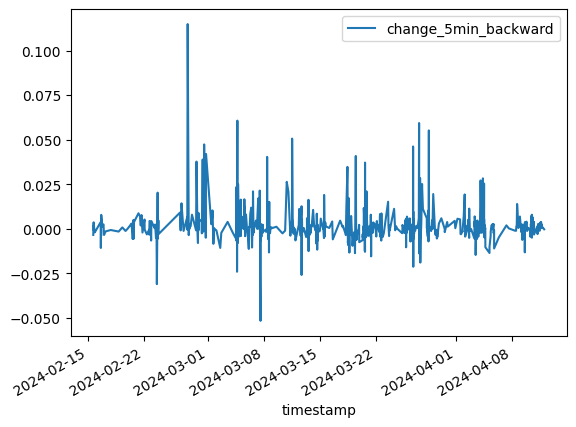

In [38]:
df_news_feature.set_index('timestamp')[['change_5min_backward']].plot()

<Axes: xlabel='timestamp'>

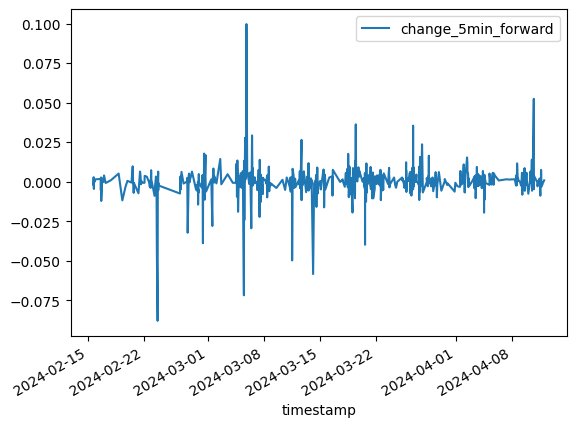

In [39]:
df_news_feature.set_index('timestamp')[['change_5min_forward']].plot()

array([[<Axes: title={'center': 'change_120min_forward'}>]], dtype=object)

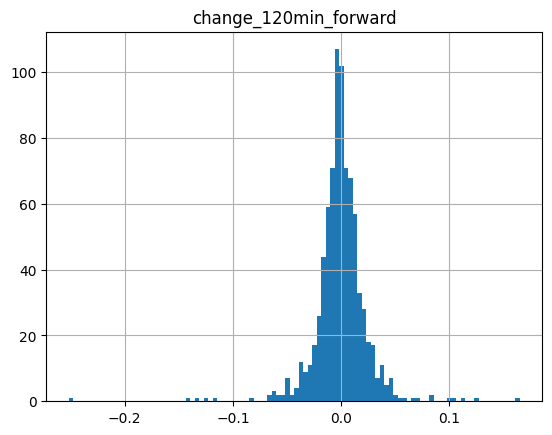

In [40]:
df_news_feature[['change_120min_forward']].hist(bins=100)

In [44]:
change_forward_minutes = [1,3,5,7,10,30,60,90,120]
df_news_feature[[f'change_{i}min_forward' for i in change_forward_minutes]].mean()

change_1min_forward     -0.000207
change_3min_forward     -0.000206
change_5min_forward      0.000082
change_7min_forward      0.000219
change_10min_forward     0.000052
change_30min_forward     0.000136
change_60min_forward    -0.000407
change_90min_forward    -0.000302
change_120min_forward   -0.000490
dtype: float64

In [45]:
df_news_feature[[f'change_{i}min_forward' for i in change_forward_minutes]].sum()

change_1min_forward     -0.169988
change_3min_forward     -0.168890
change_5min_forward      0.067120
change_7min_forward      0.179710
change_10min_forward     0.042815
change_30min_forward     0.111263
change_60min_forward    -0.334390
change_90min_forward    -0.247740
change_120min_forward   -0.402679
dtype: float64

In [47]:
df_news_feature[[f'change_{i}min_backward' for i in change_forward_minutes]].mean()

change_1min_backward      0.001926
change_3min_backward      0.001804
change_5min_backward      0.001668
change_7min_backward      0.001708
change_10min_backward     0.001605
change_30min_backward     0.002397
change_60min_backward     0.002898
change_90min_backward     0.002467
change_120min_backward    0.003100
dtype: float64

In [48]:
df_news_feature[[f'change_{i}min_backward' for i in change_forward_minutes]].sum()

change_1min_backward      1.581185
change_3min_backward      1.480802
change_5min_backward      1.369531
change_7min_backward      1.402096
change_10min_backward     1.317917
change_30min_backward     1.967571
change_60min_backward     2.379403
change_90min_backward     2.025440
change_120min_backward    2.544834
dtype: float64